#### Decision Tree Regression

CART - Classification and Regression Trees

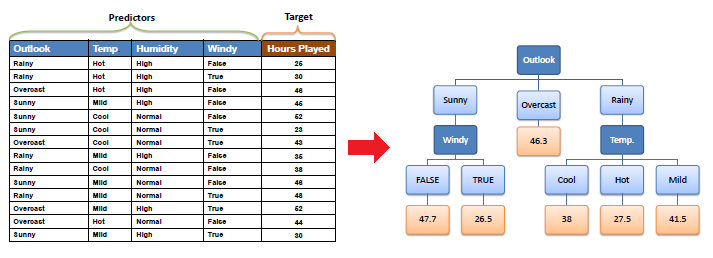

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1. AT - Atmospheric temperature
2. V - Vaccum pressure in the boiler
3. AP - Atmospheric Pressure
4. RH - Relative Humidity in %
5. PE - Power Output in Mega Watts

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93



#### Step 3 - Seperate X and Y(PE)

In [10]:

X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [11]:

X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:

Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

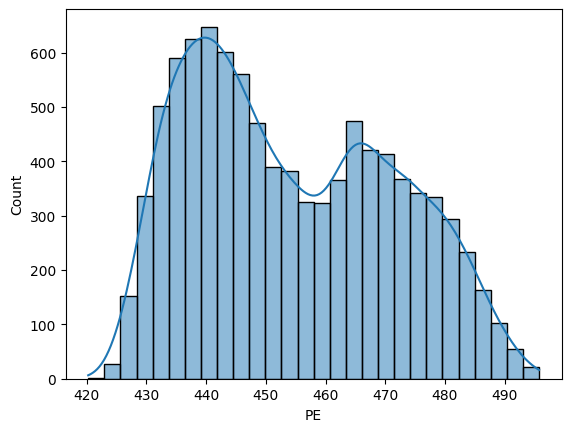

In [13]:

import seaborn as sns
sns.histplot(data=df, x="PE", kde=True)

#### Step 4- Apply preprocessing on X

In [14]:

X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:

num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


#### Step 5 - Apply train test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [22]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [23]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [24]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [25]:
xtrain.shape

(7621, 4)

In [26]:
xtest.shape

(1906, 4)


#### Step 6 - Model Building and tuning

In [28]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split= 5,
    min_samples_leaf= 5,
    criterion= "absolute_error"
)
model1.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [29]:

model1.score(xtrain, ytrain)

0.7166091272473123

In [30]:

model1.score(xtest, ytest)

0.7239856941587868


#### Hyperparameter tuning - RandomisedSearchCV

In [32]:

params = {
    "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split":[5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [5, 6, 7, 8, 9, 10],
    "criterion": ["squared_error", "absolute_error"]
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
rscv = RandomizedSearchCV(dtr, param_distributions=params, cv=5, scoring="r2", n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10]},
                   scoring='r2')

In [34]:

rscv.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_depth': 9,
 'criterion': 'absolute_error'}

In [35]:

rscv.best_score_

np.float64(0.9390725233585645)

In [36]:
best_dtr = rscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=5, min_samples_split=9)


#### Step 7 - Evaluate the model

In [38]:

best_dtr.score(xtrain, ytrain)

0.9568456492841306

In [39]:

best_dtr.score(xtest, ytest)

0.9455543673121592

In [40]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [41]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [42]:

print("Training Results : ")
evaluate_model(best_dtr, xtrain, ytrain)

Training Results : 
RMSE : 3.52
MAE : 2.38
MAPE : 0.52%
R2 : 95.68%


In [43]:

print("Testing Results :")
evaluate_model(best_dtr, xtest, ytest)

Testing Results :
RMSE : 4.05
MAE : 2.97
MAPE : 0.66%
R2 : 94.56%


In [44]:

ypred_test = best_dtr.predict(xtest)
ypred_test[0:5]

array([429.98, 483.1 , 478.69, 449.03, 447.89])

In [45]:

ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47



#### Plotting decision tree

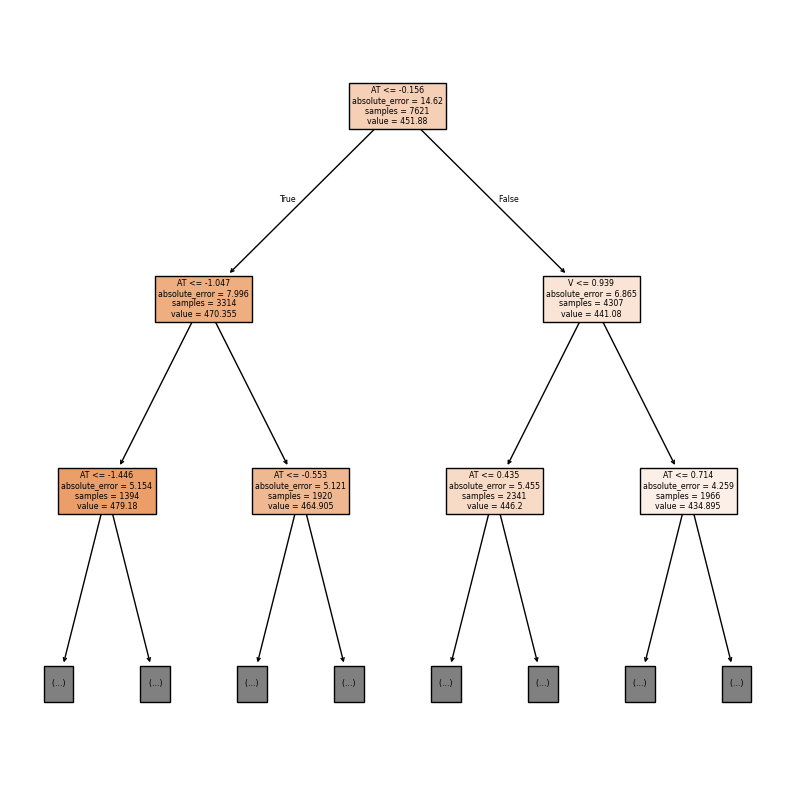

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2)
plt.show()


#### Feature importances

In [50]:

best_dtr.feature_importances_

array([0.81658416, 0.13885121, 0.02445666, 0.02010797])

In [51]:

xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [52]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.816584
V     0.138851
AP    0.024457
RH    0.020108
dtype: float64

<Axes: >

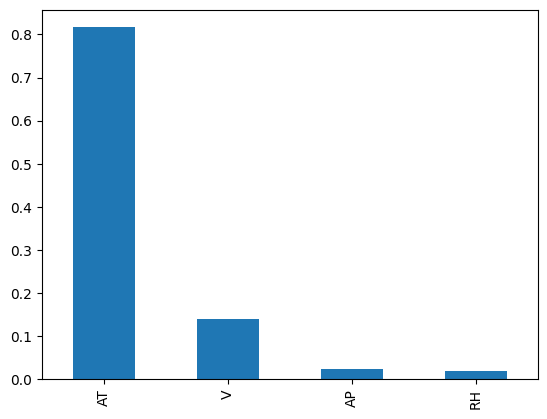

In [53]:

imp.plot(kind="bar")


#### Step 8 - Out of sample prediction

In [55]:
xnew = pd.read_csv("PowerPlantTest.csv")
xnew

,AT,V,AP,RH
0,25,51.0,1012,91
1,31,60.0,1005,50
2,20,47.0,1003,83
3,38,67.0,1008,70
4,23,NaN,1013,54


In [56]:

num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [57]:

xnew_pre = num_pipe.transform(xnew)

In [58]:

xnew_pre

,AT,V,AP,RH
0,0.717594,-0.259618,-0.208256,1.209376
1,1.523612,0.449845,-1.386664,-1.597546
2,0.045913,-0.574935,-1.723353,0.661684
3,2.463966,1.001650,-0.881632,-0.228316
4,0.448922,-0.174482,-0.039912,-1.323700


In [59]:

preds = best_dtr.predict(xnew_pre)
preds

array([441.04 , 438.02 , 452.795, 430.09 , 451.64 ])

In [60]:
xnew["PE_pred"] = preds

In [61]:

xnew

,AT,V,AP,RH,PE_pred
0,25,51.0,1012,91,441.040
1,31,60.0,1005,50,438.020
2,20,47.0,1003,83,452.795
3,38,67.0,1008,70,430.090
4,23,NaN,1013,54,451.640


In [62]:

xnew.to_csv("Results.csv", index=False)


#### Step 9 - Save the model object

In [64]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:

best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=5, min_samples_split=9)

In [66]:
import joblib


joblib.dump(num_pipe, "pipe.joblib")

['pipe.joblib']

In [67]:

joblib.dump(best_dtr, "dtr.joblib")

['dtr.joblib']

In [68]:
# Load object
p = joblib.load("pipe.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [69]:
m = joblib.load("dtr.joblib")
m

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=5, min_samples_split=9)